# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Alan Paul García Rosales

- ID: A01639631

- My career: Ingeniería en Tecnologías Computacionales


# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


# A1 Load your dataset

In [2]:
url = "A01639631.csv"

#Read de .csv file snf dtore it as a pandas dataframe
dataset = pd.read_csv(url)


# A2 DataManagment


Print the first 7 rows

In [3]:
dataset.head(7)


,ID,x1,x2
0,0,-9.214419,7.177861
1,1,2.193402,-9.358009
2,2,4.917426,-8.772537
3,3,-0.777367,-10.054131
4,4,1.298164,-9.979186
5,5,3.131421,1.670491
6,6,2.636127,-11.883866


Print the first 4 last rows

In [4]:
dataset.tail(4)


,ID,x1,x2
627,627,-11.114813,9.839311
628,628,4.028000,-0.113844
629,629,-1.241921,-10.479683
630,630,4.048131,-7.605697


How many rows and columns are in your data?

Use the `shape` method


In [5]:
print(dataset.shape)

(631, 3)


Print the name of all columns 

Use the `columns` method

In [6]:
print(dataset.columns)

Index(['ID', 'x1', 'x2'], dtype='object')


What is the data type in each column

Use the `dtypes` method 

In [7]:
print(dataset.dtypes)

ID      int64
x1    float64
x2    float64
dtype: object


What is the meaning of rows and columns?

In [8]:
# Your responses here

# 1) La primera columna solo son ID's para identificar el número de dato en el que estamos trabajando.

# 2) La segunda columna, supongo es una posición 'x1' de un plano.

# 3) Siguiendo la lógica de la segunda columna, puedo decir que la tercera columna 
#    es la posición 'x2' del mismo plano.

Print a statistical summary of your columns


In [9]:
dataset.describe()

,ID,x1,x2
count,631.00000,631.000000,631.000000
mean,315.00000,-0.650699,-2.229706
std,182.29829,5.939449,7.805425
min,0.00000,-13.710642,-12.719525
25%,157.50000,-4.852768,-9.337492
50%,315.00000,1.386670,-5.284323
75%,472.50000,4.073813,5.041169
max,630.00000,8.037764,13.101330


In [10]:
#Para las siguientes preguntas no tomaré en cuenta la variable 1, porque 
#solamente nos dice la fila en la que nos encontramos

# 1) What is the minumum and maximum values of each variable
#Para x1: mínimo: -13.710642;  máximo: 8.037764
#Para x2: mínimo: -12.719525;  máximo: 13.101330

# 2) What is the mean and standar deviation of each variable
#Para x1: mean: -0.650699; std: 5.939449
#Para x2: mean: -2.229706; std: 7.805425

# 3) What the 25%, 50% and 75% represent?
#Estos porcentajes representan los cuartiles, el primer cuartil (25%) indica que el 25% de los datos
#son menor que o iguales al número mostrado.

#El segundo cuartil se refiere a la mediana, y nos indica que la mitad de los datos son menores a esta.

#El tercer cuartil (75%) nos indica que el 75% de los datos son menores al número mostrado en esta fila.


Rename the columns using the same name with capital letters

In [11]:
dataset = dataset.rename(columns={'ID':'ID', 'x1':'X1', 'x2':'X2'})
dataset.columns

Index(['ID', 'X1', 'X2'], dtype='object')

Rename the columns to their original names

In [12]:
dataset = dataset.rename(columns={'ID':'ID', 'X1':'x1', 'X2':'x2'})
dataset.columns

Index(['ID', 'x1', 'x2'], dtype='object')

Use two different alternatives to get one of the columns

In [13]:
print(dataset.x1)
print(dataset["x1"])

0      -9.214419
1       2.193402
2       4.917426
3      -0.777367
4       1.298164
         ...    
626     3.206689
627   -11.114813
628     4.028000
629    -1.241921
630     4.048131
Name: x1, Length: 631, dtype: float64
0      -9.214419
1       2.193402
2       4.917426
3      -0.777367
4       1.298164
         ...    
626     3.206689
627   -11.114813
628     4.028000
629    -1.241921
630     4.048131
Name: x1, Length: 631, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [14]:
dataset.loc[62:72, ["x1","x2"]]

,x1,x2
62,5.879186,-7.341220
63,-2.503993,-11.365830
64,-9.457026,5.675969
65,-10.890063,9.211370
66,5.014920,-9.880179
67,-1.224498,-9.376056
68,6.335585,0.201818
69,-1.128286,-7.394939
70,-10.981309,6.016379
71,4.502561,2.701342


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [15]:
print(dataset.isnull().sum())

ID    0
x1    0
x2    0
dtype: int64


In [16]:
print(dataset.notnull().sum())

ID    631
x1    631
x2    631
dtype: int64


Discard the first column


In [17]:
dataset.drop(['ID'], axis='columns',inplace=True)
dataset.columns

Index(['x1', 'x2'], dtype='object')

### Questions 

Based on the previos reults, provide a description of yout dataset

Your response:
- En el presente dataset, podemos ver que hay tres variables, de las cuales, solo 2 nos son útiles porque la otra variable se refiere solo al ID, por otro lado tenemos 631 observaciones.
- Volviendo al tema de las variables, podemos notar que una depende de la otra para poder graficarse.



# A3 Data visualization

Plot in the same figure the histogram of the two first two variables

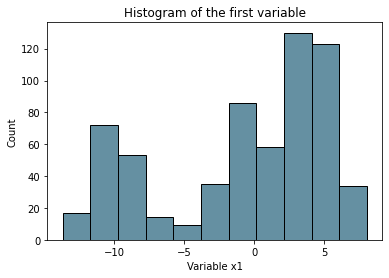

In [18]:
h1 = sns.histplot(dataset["x1"], kde = False, color = '#316B83')
h1.set_title("Histogram of the first variable")
h1.set_xlabel("Variable x1")
plt.show()

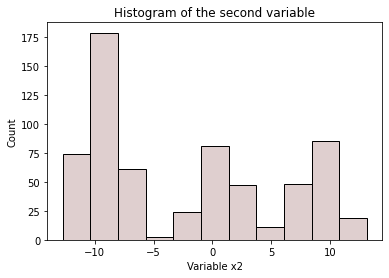

In [19]:
h1 = sns.histplot(dataset["x2"], kde = False, color ='#D5BFBF')
h1.set_title("Histogram of the second variable")
h1.set_xlabel("Variable x2")
plt.show()

Based on this two plots, provide a description of your data:

Your response here:
- Una vez viendo los histogramas, podríamos decir que las observaciones de x1 son casi las opuestas a las de x2, porque en el histograma de x1 vemos que comienza con baras pequeñas-medianas y termina en medianas-grandes, mientras que en el histograma de x2 sucede al revés.

Plot in the same figure the boxplot of the two first two variables 

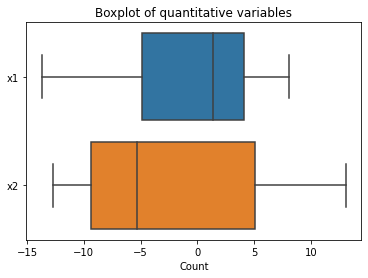

In [20]:
bplots = dataset.loc[:, ["x1","x2"]]
b = sns.boxplot(data = bplots, orient = "h")
b.set_title("Histogram of the first two variables")
b.set_xlabel("Count")
b.set_title("Boxplot of quantitative variables")
plt.show()


Scatter plot of the two first variables

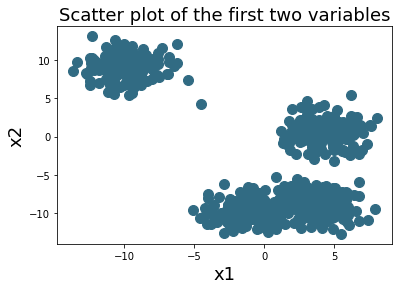

In [21]:
plt.scatter(dataset.x1, dataset.x2, color = '#316B83', marker = 'o', s=100, alpha=1)
plt.title('Scatter plot of the first two variables', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
plt.show()


### Questions 

Based on the previous plots, provide a description of yout dataset

Your response:
- Observando gráficamente la distribución de los puntos, podríamos decir que a simple vista tenemos tres clusters.



# A4 Kmeans

Do Kmeans clustering assuming a number of clusters according to your scatter plot

In [22]:
K = 3

#Crear objeto para hacer el kmeans y definir el número de clusters
km = KMeans(n_clusters=K)

#Do kmeans
clusters = km.fit_predict(dataset[['x1', 'x2']])



Add to your dataset a column with the assigned cluster to each data point

In [23]:
dataset['cluster1'] = clusters
dataset

,x1,x2,cluster1
0,-9.214419,7.177861,1
1,2.193402,-9.358009,0
2,4.917426,-8.772537,0
3,-0.777367,-10.054131,0
4,1.298164,-9.979186,0
...,...,...,...
626,3.206689,-8.292491,0
627,-11.114813,9.839311,1
628,4.028000,-0.113844,2
629,-1.241921,-10.479683,0


Print the number associated to each cluster

In [24]:
print(clusters)

[1 0 0 0 0 2 0 1 2 1 2 1 2 0 2 1 0 1 1 0 0 1 2 1 0 0 1 1 2 0 0 0 2 1 0 0 0
 0 0 0 1 2 0 0 0 1 0 1 2 2 0 1 2 1 0 0 1 2 2 1 0 0 0 0 1 1 0 0 2 0 1 2 2 2
 1 0 0 1 0 0 2 0 0 0 0 1 1 0 2 2 1 0 2 0 2 1 0 0 2 2 0 0 0 1 1 0 0 0 0 0 0
 0 2 1 0 1 2 0 0 0 1 0 2 1 0 0 1 2 2 2 0 2 0 2 0 0 0 0 1 1 0 0 0 1 1 2 0 2
 1 2 0 0 0 0 0 0 2 0 1 0 0 2 1 0 0 0 1 1 1 0 2 1 2 0 0 0 2 0 1 1 1 0 0 1 2
 0 0 0 1 1 0 1 2 1 0 2 2 0 1 0 2 2 0 1 0 0 0 0 2 0 0 0 1 2 2 0 0 1 1 0 0 0
 0 2 0 2 0 2 0 0 1 0 0 0 2 0 2 2 0 2 1 2 1 0 0 0 0 1 0 1 2 0 0 1 1 2 0 1 1
 0 1 1 1 0 1 0 0 0 1 0 0 1 0 2 0 1 0 2 0 0 2 0 0 0 0 1 2 2 1 2 2 1 0 2 2 0
 0 2 2 2 0 2 0 1 2 0 0 0 0 0 1 0 2 0 2 1 1 0 1 2 0 0 2 0 0 0 1 0 0 0 0 0 0
 1 0 1 2 0 0 1 1 0 1 1 0 1 2 0 1 0 0 2 2 0 1 2 0 1 2 1 2 1 1 1 2 0 1 2 0 1
 2 0 1 1 2 0 0 0 0 2 0 1 0 1 0 0 0 0 0 0 0 2 0 0 0 2 1 2 1 2 2 2 0 0 2 0 0
 2 0 1 2 1 1 0 0 0 2 1 1 1 1 2 0 2 1 0 0 1 0 2 2 1 2 0 1 0 0 2 2 1 2 0 0 0
 1 1 1 2 2 2 0 0 1 0 1 2 0 1 0 0 0 0 1 1 1 0 0 2 1 2 0 0 2 0 0 0 0 1 2 2 1
 0 0 1 2 0 0 0 0 0 2 0 1 

Print the centroids

In [25]:
print(km.cluster_centers_)

[[ 1.45167506 -9.26521441]
 [-9.86944223  9.02663284]
 [ 4.39523179  0.60290039]]


Print the intertia metric

In [26]:
print(km.inertia_)

4864.645547017257


Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

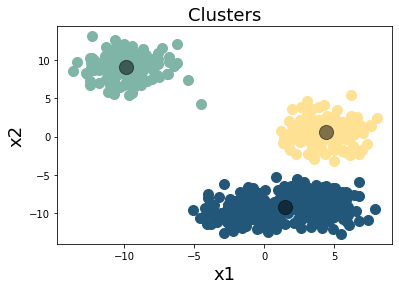

In [27]:
df1 = dataset[dataset.cluster1 == 0]
df2 = dataset[dataset.cluster1 == 1]
df3 = dataset[dataset.cluster1 == 2]

plt.scatter(df1.x1, df1.x2, color='#22577A', marker = 'o', s=100, alpha=1)
plt.scatter(df2.x1, df2.x2, color='#7EB5A6', marker = 'o', s=100, alpha=1)
plt.scatter(df3.x1, df3.x2, color='#FFE194', marker = 'o', s=100, alpha=1)

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.title('Clusters', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
 
plt.show()

### Questions 

Provides a detailed description of your results

Your response:
- Desde mi punto de vista la clusterización ha resultado bastante bien y los centroides están en excelente lugar, por lo que no consideraría necesario hacer normalización de los datos y casi podría decir que no es necesario el elbow plot, pero para asegurarnos que el número de clusters es el adecuado, lo haremos a continuación.

# A4 Elbow plot

Compute the Elbow plot

In [28]:
sse=[]
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['x1', 'x2']])
    sse.append(km.inertia_)

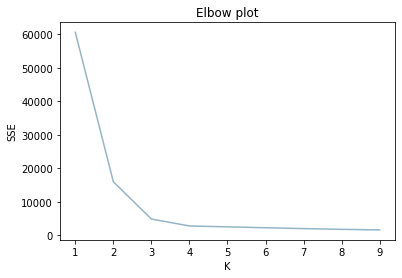

In [29]:
plt.plot(k_rng, sse, color = '#93B5C6')
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

### Questions 

What is the best number of clusters K? (argue your response)

Your response:
- A mi parecer el mejor número de clusters sería 3, porque en el elbow plot vemos que ahí hay un punto de inflexión y a partir de ahí no se observan cambios importantes en la gráfica.

Does this number of clusters agree with your inital guess? (argue your response)

Your response:
- Si, el número de clusters ideal de la elbow plot coincide con mi estimación inicial, en un principio por la scatter plot yo pensaba que eran 3 clusters y una vez haciendo la gráfica de codo, efectivamente eran 3 clusters.


# A4 Normalizing the data: preprocessing using min max scaler


Normalize the data using min max scaler

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['x1']])
dataset['x1'] = scaler.transform(dataset[['x1']])

scaler.fit(dataset[['x2']])
dataset['x2'] = scaler.transform(dataset[['x2']])

print(dataset.head(20))


          x1        x2  cluster1
0   0.206738  0.770594         1
1   0.731274  0.130186         0
2   0.856526  0.152860         0
3   0.594677  0.103226         0
4   0.690111  0.106129         0
5   0.774404  0.557302         2
6   0.751631  0.032364         0
7   0.333684  0.850428         1
8   0.702161  0.453855         2
9   0.057093  0.772390         1
10  0.787116  0.440715         2
11  0.057877  0.888364         1
12  0.852781  0.465457         2
13  0.668682  0.287953         0
14  0.901957  0.504824         2
15  0.192436  0.862564         1
16  0.796516  0.157715         0
17  0.317416  0.895840         1
18  0.195131  0.952731         1
19  0.775568  0.080747         0


Print a statistical summary of your columns (normalized data)

In [31]:
print(dataset.describe())

               x1          x2    cluster1
count  631.000000  631.000000  631.000000
mean     0.600501    0.406254    0.748019
std      0.273098    0.302292    0.828974
min      0.000000    0.000000    0.000000
25%      0.407288    0.130981    0.000000
50%      0.694180    0.287953    0.000000
75%      0.817736    0.687843    1.000000
max      1.000000    1.000000    2.000000


In [41]:
# 1) What is the minumum and maximum values of each variable
# Para x1: mínimo: 0;  máximo: 1
# Para x2: mínimo: 0;  máximo: 1

# 2) What is the mean and standar deviation of each variable
# Para x1: mean: 0.600501; std: 0.273098
# Para x2: mean: 0.406254; std: 0.302292

# 3) What the 25%, 50% and 75% represent?
# Estos porcentajes representan los cuartiles, el primer cuartil (25%) indica que el 25% de los datos
# son menor que o iguales al número mostrado.

# El segundo cuartil se refiere a la mediana, y nos indica que la mitad de los datos son menores a esta.

# El tercer cuartil (75%) nos indica que el 75% de los datos son menores al número mostrado en esta fila.

# 4) Are the minimum and maximum values equal to your original data?
# No, en este caso la normalización los ha dejado entre cero y uno.
# Mientras que originalmente estaban de la siguiente manera:
# Para x1: mínimo: -13.710642;  máximo: 8.037764
# Para x2: mínimo: -12.719525;  máximo: 13.101330



Plot the scatter plot of your normalizaed data

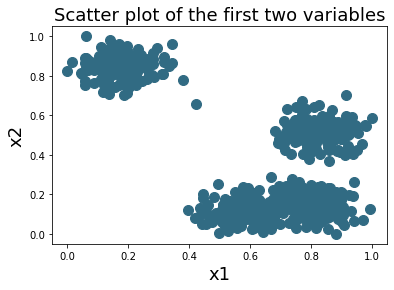

In [33]:
plt.scatter(dataset.x1, dataset.x2, color = '#316B83', marker = 'o', s=100, alpha=1)
plt.title('Scatter plot of the first two variables', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
plt.show()

Do Kmeans clustering assuming a number of clusters accorgind to your scatter plot

In [34]:
K = 3

#Crear objeto para hacer el kmeans y definir el número de clusters
km = KMeans(n_clusters=K)

#Do kmeans
clusters = km.fit_predict(dataset[['x1', 'x2']])
print(clusters)

[1 2 2 2 2 0 2 1 0 1 0 1 0 2 0 1 2 1 1 2 2 1 0 1 2 2 1 1 0 2 2 2 0 1 2 2 2
 2 2 2 1 0 2 2 2 1 2 1 0 0 2 1 0 1 2 2 1 0 0 1 2 2 2 2 1 1 2 2 0 2 1 0 0 0
 1 2 2 1 2 2 0 2 2 2 2 1 1 2 0 0 1 2 0 2 0 1 2 2 0 0 2 2 2 1 1 2 2 2 2 2 2
 2 0 1 2 1 0 2 2 2 1 2 0 1 2 2 1 0 0 0 2 0 2 0 2 2 2 2 1 1 2 2 2 1 1 0 2 0
 1 0 2 2 2 2 2 2 0 2 1 2 2 0 1 2 2 2 1 1 1 2 0 1 0 2 2 2 0 2 1 1 1 2 2 1 0
 2 2 2 1 1 2 1 0 1 2 0 0 2 1 2 0 0 2 1 2 2 2 2 0 2 2 2 1 0 0 2 2 1 1 2 2 2
 2 0 2 0 2 0 2 2 1 2 2 2 0 2 0 0 2 0 1 0 1 2 2 2 2 1 2 1 0 2 2 1 1 0 2 1 1
 2 1 1 1 2 1 2 2 2 1 2 2 1 2 0 2 1 2 0 2 2 0 2 2 2 2 1 0 0 1 0 0 1 2 0 0 2
 2 0 0 0 2 0 2 1 0 2 2 2 2 2 1 2 0 2 0 1 1 2 1 0 2 2 0 2 2 2 1 2 2 2 2 2 2
 1 2 1 0 2 2 1 1 2 1 1 2 1 0 2 1 2 2 0 0 2 1 0 2 1 0 1 0 1 1 1 0 2 1 0 2 1
 0 2 1 1 0 2 2 2 2 0 2 1 2 1 2 2 2 2 2 2 2 0 2 2 0 0 1 0 1 0 0 0 2 2 0 2 2
 0 2 1 0 1 1 2 2 2 0 1 1 1 1 0 2 0 1 2 2 1 2 0 0 1 0 2 1 2 2 0 0 1 0 2 2 2
 1 1 1 0 0 0 2 2 1 2 1 0 2 1 2 2 2 2 1 1 1 2 2 0 1 0 2 2 0 2 2 2 2 1 0 0 1
 2 2 1 0 2 2 2 2 2 0 2 1 

Add to your dataset a column with the assihned cluster to each data point

In [35]:
dataset['cluster2'] = clusters
print(dataset.head(20))

          x1        x2  cluster1  cluster2
0   0.206738  0.770594         1         1
1   0.731274  0.130186         0         2
2   0.856526  0.152860         0         2
3   0.594677  0.103226         0         2
4   0.690111  0.106129         0         2
5   0.774404  0.557302         2         0
6   0.751631  0.032364         0         2
7   0.333684  0.850428         1         1
8   0.702161  0.453855         2         0
9   0.057093  0.772390         1         1
10  0.787116  0.440715         2         0
11  0.057877  0.888364         1         1
12  0.852781  0.465457         2         0
13  0.668682  0.287953         0         2
14  0.901957  0.504824         2         0
15  0.192436  0.862564         1         1
16  0.796516  0.157715         0         2
17  0.317416  0.895840         1         1
18  0.195131  0.952731         1         1
19  0.775568  0.080747         0         2


Print the centroids

In [36]:
print(km.cluster_centers_)

[[0.83319967 0.51435855]
 [0.17661983 0.84219356]
 [0.69639603 0.13336789]]


Print the intetia metric

In [37]:
print(km.inertia_)

9.385284895641437


Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

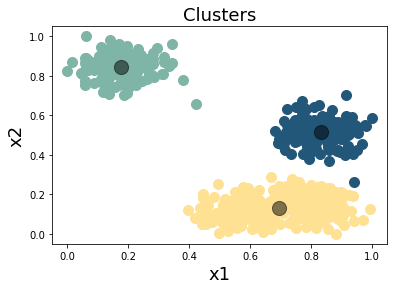

In [39]:
#Clusters calculados
df1 = dataset[dataset.cluster2 == 0]
df2 = dataset[dataset.cluster2 == 1]
df3 = dataset[dataset.cluster2 == 2]

plt.scatter(df1.x1, df1.x2, color='#22577A', marker = 'o', s=100, alpha=1)
plt.scatter(df2.x1, df2.x2, color='#7EB5A6', marker = 'o', s=100, alpha=1)
plt.scatter(df3.x1, df3.x2, color='#FFE194', marker = 'o', s=100, alpha=1)

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.title('Clusters', fontsize=18)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
 
plt.show()

### Questions 

Provides a detailed description of your results. Does the normalization improves the clustering?

Your response:

- Una vez haciendo la normalización y el clustering correspondiente a esta, llegamos a un clustering un poco diferente, sin embargo, considero que la normalización en este caso no ha ayudado a mejorar el clustering, por que, por ejemplo, el cluster azul toma un punto del cluster amarillo a mi parecer, en este caso no es necesario hacer la normalización.

# Descripción de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:
- Desde mi punto de vista considero que esta subcompetencua se ha logrado conseguir en su totalidad gracias a que a lo largo de la semana Tec el profesor explicó de manera idónea todos los aspectos necesarios para poder analizar diferentes modelos y dar un análisis completo a los mismos, como se pudo apreciar en la presente evidencia.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:
- Considero que he logrado en su totalidad esta subcompetencia, porque como podemos ver en el presente documento, logré hacer el análisis necesario para llegar a explicar un fenómeno de dos variables. Esto fue posible gracias a que el profesor se ha mostrado siempre receptivo ante las dudas de nosotros los estudiantes y ha explicado todo lo necesario para poder lograr el respectivo análisis del modelo.